# Customer Churn Analysis

**By John Lubisich**

**Objective:**
Predict which customers are likely to churn and provide actionable insights to reduce churn.


## Step 1 Preprocess Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/teleco-customer-churn.csv')

In [3]:
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.drop(columns=['customerID'], inplace=True)

In [7]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)


In [9]:
df['HasInternet'] = df['InternetService'].isin(['Fiber optic', 'DSL']).astype(int)


In [10]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
#One-Hot Encoding

In [11]:
cols_with_no_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_with_no_service:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 2})


In [12]:
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 2})


## Step 2 Exploratory Data Analysis

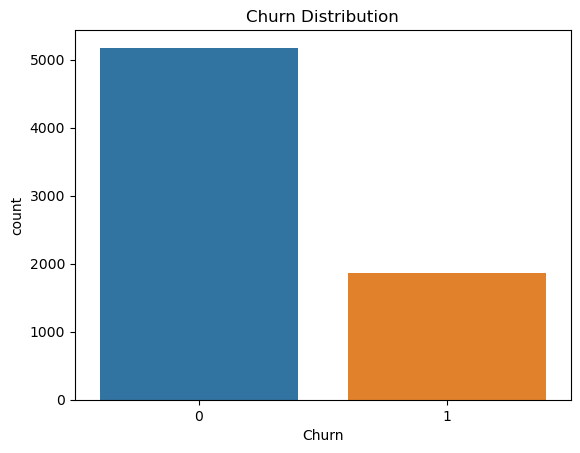

Churn Rate: 26.54%


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x=df['Churn'])
plt.title('Churn Distribution')
plt.show()

churn_rate = df['Churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")


In [ ]:
#shows that the classes are imbalanced, less churners than nonchurners 

C:\Users\johnj\AppData\Local\Temp\ipykernel_29888\2260840066.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


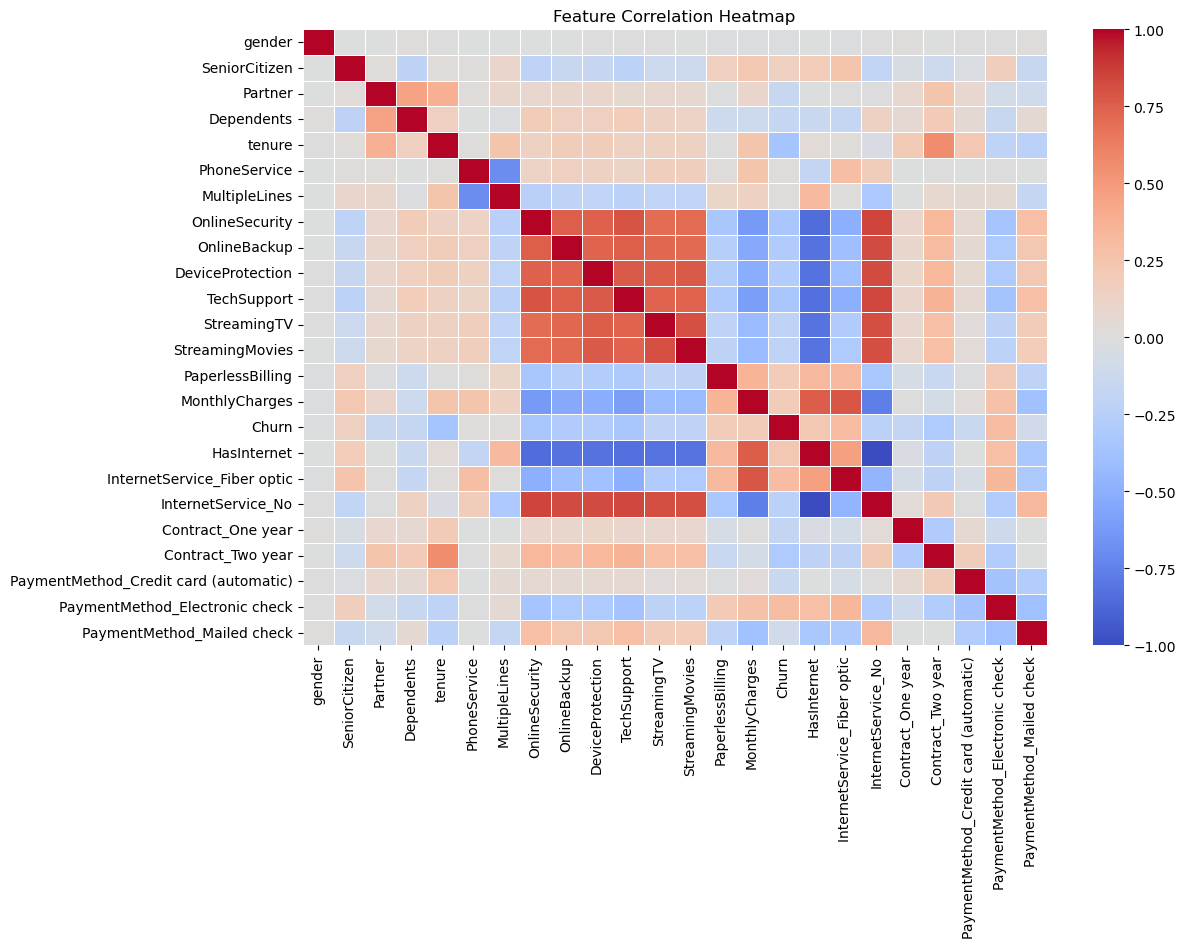

In [14]:
import numpy as np

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [15]:
#think about dropping techsupport, onlinesecurity, or device protection, these seem related and are highly correlated so
#could be redundent or maybe combine all of them into one, and call it hassecurityfeautre, 1 if any of them
#pobably drop streamingtv or streamingmovies or combine into has streaming
#dropping total charges as well, monthly charges more accurate (total is just monthly times tenure)

In [16]:

df['HasSecurityFeatures'] = df[['TechSupport', 'OnlineSecurity', 'DeviceProtection']].max(axis=1)

df['HasStreaming'] = df[['StreamingTV', 'StreamingMovies']].max(axis=1)

df = df.drop(['TechSupport', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'StreamingMovies'], axis=1)

df.drop('TotalCharges', axis=1, inplace=True)


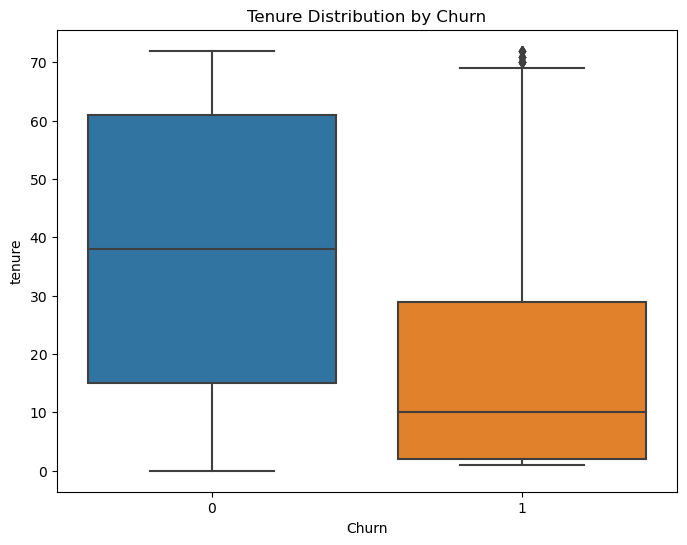

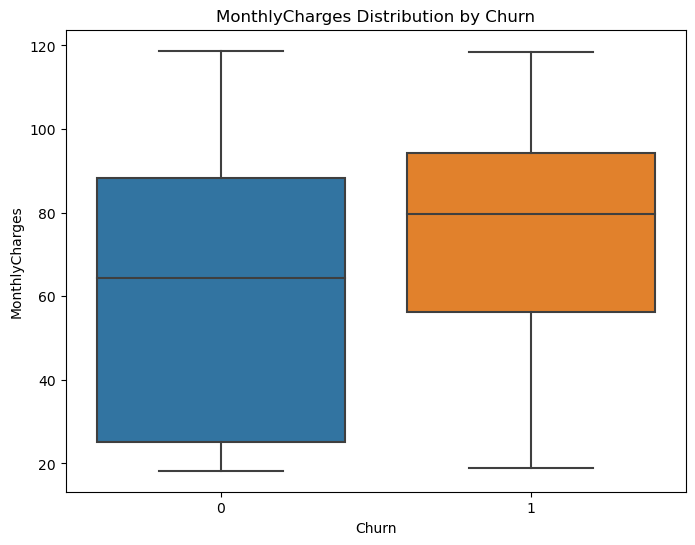

In [17]:
# Boxplot for tenure vs. churn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Churn'], y=df['tenure'])
plt.title("Tenure Distribution by Churn")
plt.show()

# Boxplot for MonthlyCharges vs. churn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'])
plt.title("MonthlyCharges Distribution by Churn")
plt.show()


-seems like for tenure, the longer they are with company less likely to churn
-for monthly charges, seems like the higher the monthly charges is, seem to churn 

## Step 3 Creating the Model

In [18]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Churn'])
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (5634, 20)
Test set size: (1409, 20)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

class_weights = {0: 1, 1: 2.5} 

model = LogisticRegression(class_weight = class_weights, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7473385379701917
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



Here I'm not too happy with the recall, I want to be able to identify more churners. I'm willing to trade off falsely identifying churners in order to catch more since that is the primary objective.

In [20]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

model = LogisticRegression(class_weight={0: 1, 1: 5}, C=10, penalty='l2', solver='liblinear')
model.fit(X_train_res, y_train_res)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob >= 0.55).astype(int)  # Adjust threshold higher

print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.95      0.54      0.68      1035
           1       0.42      0.91      0.57       374

    accuracy                           0.64      1409
   macro avg       0.68      0.73      0.63      1409
weighted avg       0.80      0.64      0.65      1409



The logistic regression model is designed to predict customer churn by analyzing key factors that influence a customer's likelihood of leaving. While the model has low precision (42%), meaning some customers are incorrectly flagged as potential churners, it achieves high recall (91%), successfully identifying the vast majority of actual churners. Since the primary goal is to catch as many churners as possible, a high recall is beneficial—even if some non-churners are misclassified, as they can still be targeted for retention efforts. This model helps businesses proactively engage at-risk customers, reducing churn through personalized offers, improved service, or targeted outreach before they leave.

## Step 4 Identify Key Features

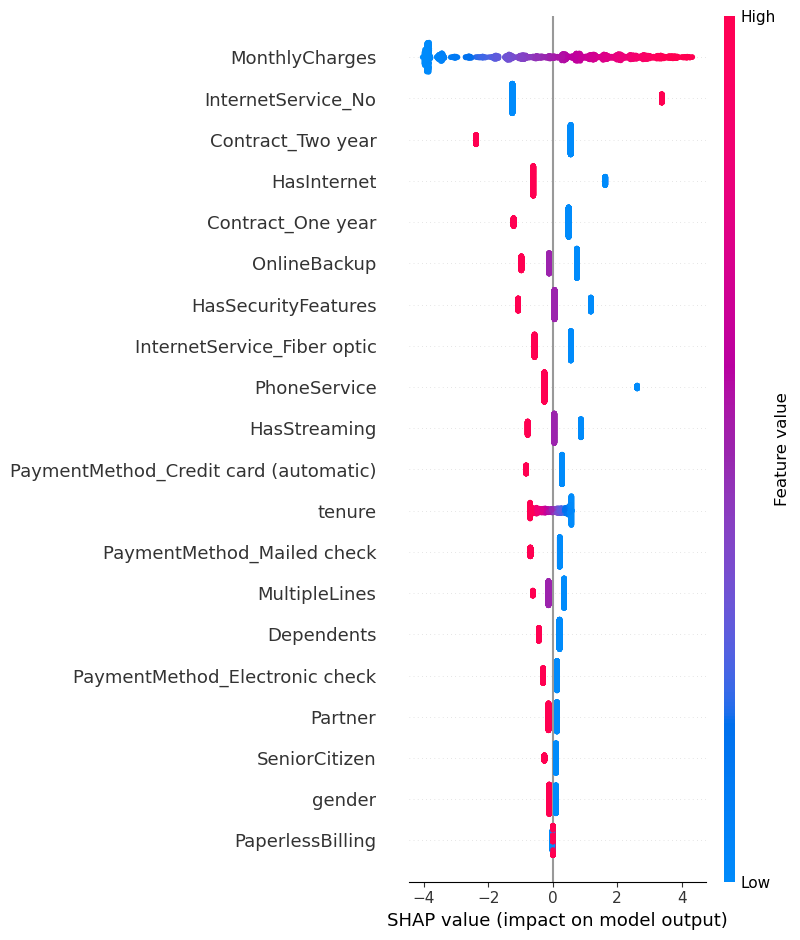

In [22]:
import shap

explainer = shap.Explainer(model, X_train)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)



**Pricing and Contract Structure Are Critical**

Customers with higher monthly charges are significantly more likely to churn. This suggests that cost-conscious customers may be seeking lower-cost alternatives.
Long-term contracts play a vital role in retention—two-year and one-year contracts strongly reduce churn, reinforcing the importance of promoting commitment-based plans.
Internet Service Type Drives Customer Behavior

Customers using fiber-optic internet are more likely to leave, potentially due to pricing or competitive service offerings. Addressing service quality and pricing concerns could mitigate this risk.
Conversely, customers who do not have internet service with us tend to stay, likely because they have fewer points of engagement with competitors.
Bundled Services Enhance Retention

Customers who subscribe to online backup and security features are significantly less likely to churn, emphasizing the value of bundled services. Encouraging customers to enroll in these add-ons can improve retention.
Payment Method Matters

Customers paying via electronic check exhibit a higher likelihood of churn, possibly due to manual payment management issues. Encouraging automatic payment methods like credit card auto-pay may improve retention.
Loyalty and Tenure Reduce Churn

Customers with longer tenure are far less likely to churn, reaffirming that customer engagement efforts over time foster loyalty.
Demographics Play a Minimal Role

Factors like age, gender, and relationship status do not significantly impact churn, suggesting that behavior and service-related factors drive retention more than demographics.

## Strategic Takeaways

Using the insights from above, to reduce churn and maximize customer retention a possible solution could be competitive pricing and loyalty incentives, such as discounts for long-term contracts, can mitigate churn from cost-sensitive customers. Expanding bundled offerings like security features and online backups will enhance customer stickiness by increasing service value. Encouraging automatic payments—particularly for electronic check users—through incentives or ease-of-use improvements can reduce churn tied to manual payment management. Given the higher churn rate among fiber-optic customers, we should investigate potential pain points, whether pricing, service quality, or competition, and develop targeted retention offers such as personalized discounts or enhanced customer support. Finally, reinforcing long-term engagement through personalized outreach, loyalty programs, and proactive customer service will strengthen tenure-based retention, ensuring a stable and growing customer base.

## Conclusion

Ultimately, this analysis not only provides a predictive tool using the lofistic regression model to classify possible churners for companies but also delivers practical business insights, enabling data-driven decision-making to improve customer retention strategies. Future work could explore more complex models, cost-sensitive learning, or real-time churn monitoring to further refine accuracy and business impact.